In [1]:
from sklearn.linear_model import SGDClassifier, SGDRegressor
import sys
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np

## Read the dataset from the CSV file

In [2]:
import pandas

df = pandas.read_csv('../datasets/bike-sharing-dataset/day.csv')

## Select only one feature ('temp') for X

In [3]:
# X = df[['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum']]
X = df[['temp']]
y = df['cnt']
print(X.head())
print(y.head())

       temp
0  0.344167
1  0.363478
2  0.196364
3  0.200000
4  0.226957
0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64


## Get the loss for each epoch

Scikit-learn does not offer a way to get the loss for each epoch, but it is printed in stdout. So replace stdout with a new stream, that holds the output in a string, which we will process later to get the loss for each epoch...

In [4]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

-- Epoch 1
Norm: 33.90, NNZs: 1, Bias: 98.500000, T: 1, Avg. loss: 485112.500000
Total training time: 0.00 seconds.
[110.167416] [985] 874.8325839969335
-- Epoch 1
Norm: 64.01, NNZs: 1, Bias: 185.983258, T: 1, Avg. loss: 382666.025011
Total training time: 0.00 seconds.
[208.01314719] [985] 776.9868528149764
-- Epoch 1
Norm: 90.75, NNZs: 1, Bias: 263.681944, T: 1, Avg. loss: 301854.284724
Total training time: 0.00 seconds.
[294.91531352] [985] 690.0846864769246
-- Epoch 1
Norm: 114.50, NNZs: 1, Bias: 332.690412, T: 1, Avg. loss: 238108.437255
Total training time: 0.00 seconds.
[372.09789904] [985] 612.9021009617479
-- Epoch 1
Norm: 135.60, NNZs: 1, Bias: 393.980622, T: 1, Avg. loss: 187824.492682
Total training time: 0.00 seconds.
[440.64799115] [985] 544.3520088543303
-- Epoch 1
Norm: 154.33, NNZs: 1, Bias: 448.415823, T: 1, Avg. loss: 148159.554772
Total training time: 0.00 seconds.
[501.53109187] [985] 483.4689081319344
-- Epoch 1
Norm: 170.97, NNZs: 1, Bias: 496.762714, T: 1, Avg. l

We will use only a single instance, to avoid the sum over all instances:

In [5]:
n = 1 ;# number of instances to keep
fX = X[:n].values
fy = y[:n].values

We are not going to use the linear regression package, we are going to use the stochastic gradient descent with suitable options, to get linear regression...

Learning rate is the parameter `eta0`, which we keep `constant`.

In [56]:
learning_rate = 0.01


sgd = SGDRegressor(loss="squared_loss", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1,
                   average=False, random_state=2018, verbose=1)

As we need to calculate also $y-\hat{y}$, we have put `max_iter=1` to do only one step, and we will simulate the epochs with our loop, using `partial_fit()`, which does not re-initialise coefficients $\overrightarrow{w}$, and proceeds with the current ones (stored in the model).

In [63]:
p_sum = [] ;# this holds the sum of y-y_hat, for all instances (ok, we have only one instance)
coef_list=[]; # this holds the coefficient values
epochs = 15 ;# number of epochs

for epoch in range(epochs):
    model = sgd.partial_fit(fX, fy)
    y = model.predict(fX)
    coef_list.append(model.coef_.tolist())
    print(model.coef_)
    p_sum.append(np.sum(fy-y))
    print(y, fy, np.sum(fy-y))

-- Epoch 1
Norm: 49.92, NNZs: 1, Bias: 145.045502, T: 1, Avg. loss: 346178.672903
Total training time: 0.00 seconds.
[49.9198754]
[162.22627608] [985] 822.7737239192808
-- Epoch 1
Norm: 52.75, NNZs: 1, Bias: 153.273240, T: 1, Avg. loss: 338478.300386
Total training time: 0.00 seconds.
[52.75159104]
[171.4285964] [985] 813.5714036025896
-- Epoch 1
Norm: 55.55, NNZs: 1, Bias: 161.408954, T: 1, Avg. loss: 330949.214380
Total training time: 0.00 seconds.
[55.55163533]
[180.52799328] [985] 804.4720067224997
-- Epoch 1
Norm: 58.32, NNZs: 1, Bias: 169.453674, T: 1, Avg. loss: 323587.604800
Total training time: 0.00 seconds.
[58.3203625]
[189.52561787] [985] 795.4743821308836
-- Epoch 1
Norm: 61.06, NNZs: 1, Bias: 177.408417, T: 1, Avg. loss: 316389.746313
Total training time: 0.00 seconds.
[61.05812282]
[198.42260845] [985] 786.5773915546404
-- Epoch 1
Norm: 63.77, NNZs: 1, Bias: 185.274191, T: 1, Avg. loss: 309351.996452
Total training time: 0.00 seconds.
[63.76526263]
[207.22009055] [985] 7

Restore the original stdout, and collect the loss from the prints in array `loss_list`:

In [64]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
print(loss_history)
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))

-- Epoch 1
Norm: 33.90, NNZs: 1, Bias: 98.500000, T: 1, Avg. loss: 485112.500000
Total training time: 0.00 seconds.
[110.167416] [985] 874.8325839969335
-- Epoch 1
Norm: 64.01, NNZs: 1, Bias: 185.983258, T: 1, Avg. loss: 382666.025011
Total training time: 0.00 seconds.
[208.01314719] [985] 776.9868528149764
-- Epoch 1
Norm: 90.75, NNZs: 1, Bias: 263.681944, T: 1, Avg. loss: 301854.284724
Total training time: 0.00 seconds.
[294.91531352] [985] 690.0846864769246
-- Epoch 1
Norm: 114.50, NNZs: 1, Bias: 332.690412, T: 1, Avg. loss: 238108.437255
Total training time: 0.00 seconds.
[372.09789904] [985] 612.9021009617479
-- Epoch 1
Norm: 135.60, NNZs: 1, Bias: 393.980622, T: 1, Avg. loss: 187824.492682
Total training time: 0.00 seconds.
[440.64799115] [985] 544.3520088543303
-- Epoch 1
Norm: 154.33, NNZs: 1, Bias: 448.415823, T: 1, Avg. loss: 148159.554772
Total training time: 0.00 seconds.
[501.53109187] [985] 483.4689081319344
-- Epoch 1
Norm: 170.97, NNZs: 1, Bias: 496.762714, T: 1, Avg. l

Print the model coefficients:

In [59]:
print(model.coef_)

[47.05613017]


## Print the loss function over epochs...

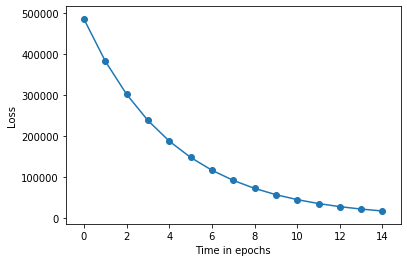

In [60]:
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.scatter(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

## Print loss with respect to $y-\hat{y}$

In our case where we use only one instance and feature, $y-\hat{y}$ gives us an approximation of how the coeeficients are changing.
This is not valid in the case we have more that 1 instaces. In that case we need to use the coeeficient(s) in the x-axis.

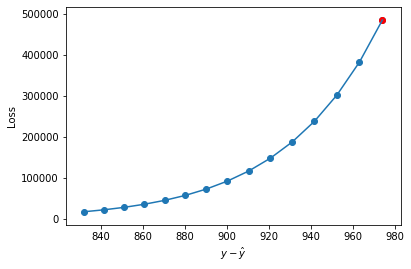

In [61]:
plt.figure()
plt.plot(p_sum, loss_list)
plt.scatter(p_sum, loss_list)
plt.scatter(p_sum[:1], loss_list[:1], color='red')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()

The red dot is the starting point. 

## Print loss with respect to coefficient

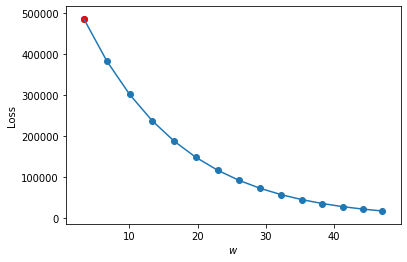

In [62]:
plt.figure()
plt.plot(coef_list, loss_list)
plt.scatter(coef_list, loss_list)
plt.scatter(coef_list[:1], loss_list[:1], color='red')
plt.xlabel("$w$")
plt.ylabel("Loss")
plt.show()